# Práctica 3: Regresión Logística Multi-clase y Redes Neuronales

Mario Quiñones Pérez y Guillermo García Patiño Lenza

## Parte 1: Regresión logística multi-clase

### Visualización de los datos

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [2]:
def cargaDatos(file = 'ex3data1.mat'):
    data = loadmat(file)
    y = data['y']
    X = data['X']
    return X,y

In [3]:
def verEjemplos():
    X,y = cargaDatos()
    ejs = np.random.choice(X.shape[0], 10)
    plt.imshow(X[ejs, :].reshape(-1,20).T)
    plt.axis('off')

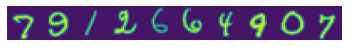

In [4]:
verEjemplos()

### Clasificación de uno frente a todos

#### Código de regresión logística de la práctica anterior

In [5]:
def sigmoide(Z):
    sigmoide = 1 / (1 + np.exp(-Z))
    return sigmoide

In [6]:
def coste(Theta, X, Y):
    G = sigmoide(np.dot(X, Theta))
    sum1 = np.dot(Y, np.log(G))
    sum2 = np.dot((1-Y), np.log(1 - G))
    return (-1 / X.shape[0]) * (sum1 + sum2)

In [7]:
def gradiente(Theta, X, Y):
    m = X.shape[0]
    G = sigmoide( np.matmul(X,Theta) )
    gradiente  = (1 / len(Y)) * np.matmul(X.T, G - Y)
    return gradiente

In [8]:
def coste_reg(Theta,X,Y, Lambda):
    c = coste(Theta,X,Y)
    m = X.shape[0]
    e = 0
    
    for t in range(1,len(Theta)):
        e += Theta[t]**2
        
    return c + (Lambda/(2*m))*e

In [9]:
def gradiente_reg(Theta,X,Y,Lambda):
    m = X.shape[0]
    gr = gradiente(Theta,X,Y)
    theta2 = (Lambda/m)*Theta
    return (gr + theta2)

In [10]:
def preparaFunciones(Lambda):
    c = lambda Theta,X,Y : coste_reg(Theta,X,Y,Lambda)
    gr = lambda Theta,X,Y : gradiente_reg(Theta,X,Y,Lambda)
    
    return (c,gr)

In [11]:

def prepara_datos(X, y, et):
   
    Y2 = (y == et) * 1
    ## Aquí hay que hacer ravel de Y2 para pasar de (5000,1) a (5000,1)
    ## y conseguir que funcione como en la practica anterior
    Y2 = np.ravel(Y2)
    return (X,Y2)

In [12]:
def optimiza_reg(X,Y,Lambda,et):
    X, Y= prepara_datos(X,Y,et)
    c, gr = preparaFunciones(Lambda)
    
    T = np.zeros(X.shape[1])

    result = opt.fmin_tnc(func = c, x0 = T, fprime = gr, args = (X, Y))
    c_f = coste(result[0], X, Y)
    print("coste:", c_f)
    return result[0]

In [13]:
def prueba2():
    X,Y = cargaDatos("ex3data1.mat")
    X, Y= prepara_datos(X,Y,0)
    print(X.shape)
    print(Y.shape)
    Theta = np.zeros(X.shape[1])
    print("Theta shape = {}".format(Theta.shape))
    c = coste_reg(Theta,X,Y,1)
    gr = gradiente_reg(Theta,X,Y,1)
   
    print(gr)
    print(c)

In [14]:
prueba2()

(5000, 400)
(5000,)
Theta shape = (400,)
[ 0.00000000e+00  0.00000000e+00  7.74530186e-08 -9.40902437e-07
 -1.79007864e-06  5.86512034e-05  7.26926011e-05  4.02459167e-05
  9.71628200e-06  2.18079282e-05  7.05070976e-06 -5.42333538e-06
 -1.17534888e-05 -2.08794594e-05 -3.26743345e-05 -2.35833248e-05
 -6.85661765e-06 -4.63698993e-08  7.31889978e-08  0.00000000e+00
  2.46800109e-08 -1.99142157e-07 -8.34097672e-07 -2.56452717e-06
 -1.42989907e-05  8.20161952e-05  2.98347610e-04  4.47927389e-04
  3.53500706e-04  1.34235160e-04 -5.08286237e-05 -1.07588366e-04
 -1.22462028e-04 -1.44337163e-04 -4.72887646e-05 -4.79718988e-06
 -2.62880753e-05 -2.72380695e-05 -3.87105120e-06 -8.85893246e-07
 -2.11721903e-07  2.19507970e-06 -1.01278496e-05  6.81754837e-05
  4.25397106e-04  1.41530164e-03  2.43250783e-03  2.72626481e-03
  2.02807562e-03  9.81235352e-04  6.25010594e-04  6.15115590e-04
  1.64897029e-03  3.95392176e-03  5.04357806e-03  3.04967608e-03
  9.54579084e-04  2.62531208e-04 -1.00785673e-05 

#### Código de la práctica 3

In [15]:
def oneVsAll(X,y,num_etiquetas,reg):
    params = []
    for et in range(num_etiquetas):
        p = optimiza_reg(X,y,reg,et)
        params.append(p)
    return np.array(params)

In [16]:
X,y = cargaDatos()
Theta = oneVsAll(X,y,10,0.1)
print(Theta.shape)

coste: 3.309827640039462e-05
coste: 0.008360021366380647
coste: 0.048193099008325836
coste: 0.06265130407015843
coste: 0.026607020319692778
coste: 0.04715622726021646
coste: 0.013260354391185423
coste: 0.025250802119906383
coste: 0.11250286209511665
coste: 0.07775397173239715
(10, 400)


In [35]:
def evalua(file = 'ex3data1.mat'):
    X, y = cargaDatos()
    Theta = oneVsAll(X,y,10,0.1)
    asig = []
    for i in range(X.shape[0]) :
        l = np.dot(Theta, X[i])
        m = max(l)
        i = np.where(l == m)
        asig.append(i[0][0])
    
    y2 = np.ravel(y)
    t = (asig == y2)*1
    perc = sum(t) / 5000
    print(perc)

In [36]:
evalua()

coste: 3.309827640039462e-05
coste: 0.008360021366380647
coste: 0.048193099008325836
coste: 0.06265130407015843
coste: 0.026607020319692778
coste: 0.04715622726021646
coste: 0.013260354391185423
coste: 0.025250802119906383
coste: 0.11250286209511665
coste: 0.07775397173239715
0.8592


## Parte 2: Redes neuronales

En esta segunda parte utilizaremos una red neuronal ya entrenada para la correcta detección de los distintos digitos posibles (0,1...9). Para ello utilizaremos las dos matrices theta1 y theta2 que son los pesos proporcionados para dicha red neuronal. Cada elemento pasará por tres capas o layers, dando como resultado diez neuronas en las que cada una se encargará de decidir como de parecido es con un numero, asi la primera se activara cuando se reconoce un 1 y asi sucesivamente hasta la decima activarse cuando reconozca un 0.

In [19]:
def prueba_neurona(datos, cargas):
    # Se cargan todos los datos necesarios para probar la neurona como sus pesos y los datos de prueba y entrenamiento (X e y)
    X = datos['X'] 
    Y = datos['y']
    n = len(y)
    theta1, theta2 = cargas['Theta1'], cargas['Theta2']
    
    # Se añade una fila de unos a la matriz inicial 
    X = np.hstack([np.ones([n,1]), X])
    
    # La capa oculta utiliza la primera matriz de pesos para crear sus neuronas y le añade una fila de unos
    Oculta = sigmoide(np.dot(X, theta1.T))
    Oculta = np.hstack([np.ones([n,1]), Oculta])
    
    # El resultado se calcula pasando por la segunda matriz de pesos todas las neuronas de la capa oculta
    Resultado = sigmoide(np.dot(Oculta, theta2.T))
    
    # Ya que cada neurona da un valor de como de parecido es el numero de prueba al numero que esta se encarga de reconocer,
    # daremos prioridad a aquella neurona que reconozca con mas exactitud dicho caso de prueba 
    comparador = np.argmax(Resultado, axis = 1)
    
    # Devolvemos el porcentaje de aciertos que la neurona a dado
    return (sum(comparador + 1 == np.ravel(y))/n*100)

In [20]:
prueba_neurona(loadmat('ex3data1.mat'), loadmat('ex3weights.mat'))

97.52